In [1]:
import os
import sys
import tqdm
import matplotlib.pyplot as plt

sys.path.append("../")

In [2]:
from utils import utils

In [3]:
results_folder = "../../results/"
src_genome = "mm10"
transcription_factors = ("CTCF", "CEBPA", "Hnf4a", "RXRA")
models = ("hybrid", "dann", "adda", "drcn")


results_dict = {}

tf_bar = tqdm.notebook.tqdm(desc="Transcription Factor", 
                            total=len(transcription_factors), 
                            position=0)

model_bar = tqdm.notebook.tqdm(desc="Model Name", 
                               total=len(models), 
                               position=1)

for tf in transcription_factors:
    for model in models:
        path_to_tgt_testfile = os.path.join(results_folder, src_genome, tf, model+"_tgt.csv.gz")
        tgt_aps = round(utils.compute_aps_from_file(path_to_tgt_testfile), 4)
        
        if tf in results_dict:
            results_dict[tf][model] = tgt_aps
        else:
            results_dict[tf] = {model: tgt_aps}
        
        model_bar.update()
        model_bar.set_postfix(TF=tf, 
                              Model=model)
        
    model_bar.n = 0    
    tf_bar.update()
        
        

Transcription Factor:   0%|          | 0/4 [00:00<?, ?it/s]

Model Name:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
tgt_genome = "hg38"
highest_dict = dict()

for tf in transcription_factors:
    tgt_highest_file = os.path.join(results_folder, tgt_genome, tf, "hybrid_src.csv.gz")
    tgt_aps_highest = round(utils.compute_aps_from_file(tgt_highest_file), 4)
    highest_dict[tf] = tgt_aps_highest

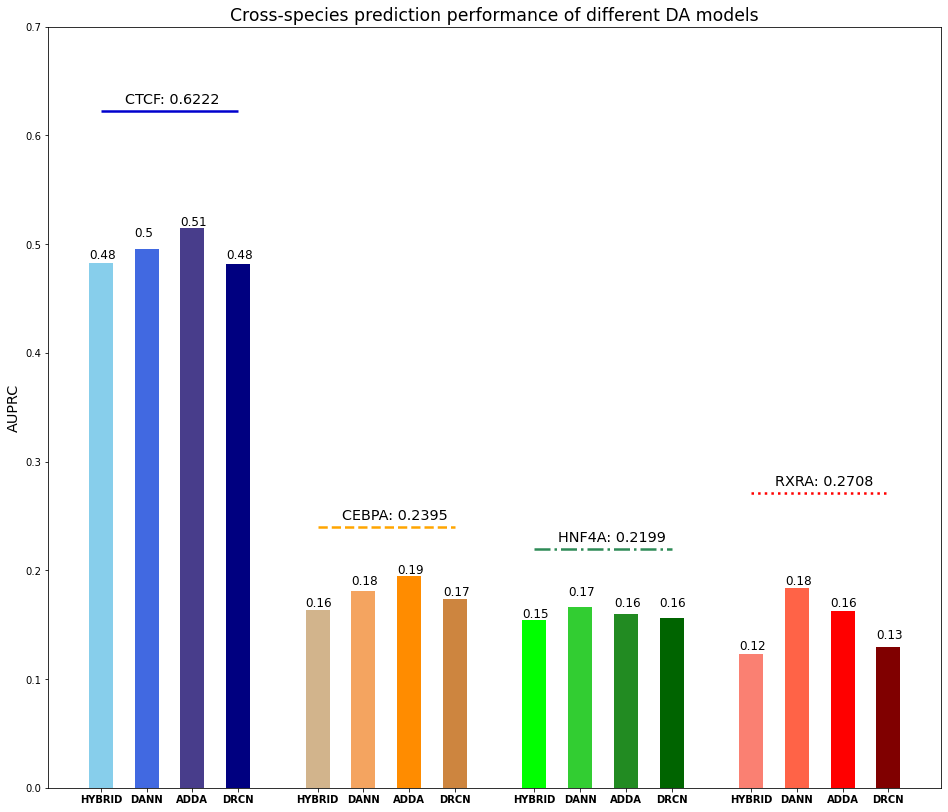

In [5]:
x_tick_location = [1+4.5*x+0.95*y for x in range(4) for y in range(4)]

plt.figure(figsize=(16, 14))
bar_colors = [["skyblue", "royalblue", "darkslateblue", "navy"],
              ["tan", "sandybrown", "darkorange", "peru"], 
              ["lime", "limegreen", "forestgreen", "darkgreen"], 
              ["salmon", "tomato", "red", "maroon"]]
src_colors = ["mediumblue", "orange", "seagreen", "red"]
src_styles = ['solid', 'dashed', 'dashdot', 'dotted']

for tfi, tf in enumerate(transcription_factors):
    end = (tfi+1)*4
    start = end-4
    plt.bar(x = x_tick_location[start:end], 
            height = [results_dict[tf][m] for m in results_dict[tf].keys()], 
            width=0.5, 
            color=bar_colors[tfi],)
    
    hgh_auprc = highest_dict[tf]
    plt.hlines(y=hgh_auprc, 
              xmin=x_tick_location[start], 
              xmax=x_tick_location[end-1], 
              color=src_colors[tfi], 
              linestyles=src_styles[tfi],
              linewidths=2.5)
    
    plt.text(x_tick_location[start] + 0.5, 
             hgh_auprc+0.007, 
             tf.upper() + ": " + str(hgh_auprc), 
             fontsize="x-large")
    

    for i, xtloc in enumerate(x_tick_location[start:end]):
        val = round([results_dict[tf][m] for m in results_dict[tf].keys()][i], 2)
        plt.text(xtloc-0.25, val+0.007, str(val), fontsize="large")
        
plt.xticks(x_tick_location, 
           [m.upper() for m in results_dict["RXRA"].keys()]*4, 
           fontweight=600)

plt.title("Cross-species prediction performance of different DA models", fontsize="xx-large")
plt.ylabel("AUPRC", fontsize="x-large")
# plt.xlabel("Transcription Factors", fontsize="x-large")
plt.ylim([0, 0.7]);